**DATA ANALYSIS E-COMMERCE PAKISTAN LARGEST DATASET 
(using EDA and RFM Method)**

---
Rizka Nur Pratama - JCDS08 Purwadhika


# Business Understanding

Data merupakan kumpulan data pesanan ritel e-commerce terbesar dari Pakistan. Data dikumpulkan sejak Maret 2016 hingga Agustus 2018. Data dapat ditemukan disini [Pakistan Largest Dataset](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset). 

Geografi: Pakistan

Periode waktu: 03/2016 – 08/2018

Unit analisis: Pesanan E-Commerce

Variabel (Kolom) :


item_id : id unik setiap item                
status  : status pemesanan            
created_at : tanggal pesanan dibuat
sku    : 
price  : harga barang               
qty_ordered : jumlah barang yang di order     
grand_total : jumlah nominal yang harus dibayarkan
increment_id   :           
category_name_1           
sales_commission_code     
discount_amount           
payment_method            
Working Date              
BI Status                 
 MV                       
Year                      
Month                     
Customer Since            
M-Y                       
FY                        
Customer ID               
Unnamed: 21              
Unnamed: 22              
Unnamed: 23              
Unnamed: 24              
Unnamed: 25 

## **Define Problems**
Sebagai seorang stakeholders pasti memerlukan **strategi dan peningkatan pelayanan** mereka agar dapat bertahan dan bersaing di dunia industri retail e-commerce. Strategi dapat menguntungkan perusahaan dan pelayanan yang tepat tentunya dapat bertujuan untuk customer churn.  **Strategi yang dibutuhkan perusahaan adalah ingin mengetahui profiling dari customer, item, kategori, status, discount dan payment method agar dapat mengetahui apa penindakan yang lebih tepat nantinya**. Selain itu, terdapat customer relationship management yang bertugas untuk memberikan **pelayanan yang tepat kepada customer, agar customer dapat kembali melakukan transaksi (customer churn)**.

**Analisis (Insight) yang diperlukan untuk peningkatan strategi perusahaan:**
1. Profilling Item (status, price, discount, metode pemabayaran serta korelasinya )
2. Profilling Kategori
3. Profilling Payment Method

**Analisis (Insight) yang diperlukan untuk peningkatan pelayanan perusahaan kepada pelanggan:**


1.   Mengetahui kategori pelanggan berdasarkan karakteristik Recency, Frequency, dan Monetary nya.



**Recommendation For Stakeholders:**
1. Memberikan skala prioritas berdasarkan insight yang didapatkan untuk strategi perusahaan.
1. Segmentasi Customer untuk memudahkan perusahaan memberikan pelayanan yang tepat sesuai dengan karakteristik masing-masing pelanggan.




# Data Understanding

In [ ]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime as dt
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

In [ ]:
#Import Dataset
df = pd.read_csv('/content/drive/MyDrive/Purwadhika/2. Data Analysis/Pakistan Largest Ecommerce Dataset.csv')


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [ ]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe(include='object')

,status,created_at,sku,increment_id,category_name_1,sales_commission_code,payment_method,Working Date,BI Status,MV,Customer Since,M-Y,FY
count,584509,584524,584504,584524,584360,447349,584524,584524,584524,584524,584513,584524,584524
unique,16,789,84889,408785,16,7226,18,789,4,9720,26,26,3
top,complete,11/25/2016,MATSAM59DB75ADB2F80,100266667,Mobiles & Tablets,\N,cod,11/25/2016,Net,999,2016-11,11-2017,FY18
freq,233685,15169,3775,72,115710,339001,271960,15169,234178,9516,82714,83928,306883


# Data Cleaning

## Missing Values

### Check Missing Values

In [ ]:
df.isnull().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

In [ ]:
#check the percentage(%) of null values in our dataset
rasio = df.isnull().sum()/df.shape[0]*100
rasio

item_id                   44.255394
status                    44.256825
created_at                44.255394
sku                       44.257302
price                     44.255394
qty_ordered               44.255394
grand_total               44.255394
increment_id              44.255394
category_name_1           44.271034
sales_commission_code     57.337434
discount_amount           44.255394
payment_method            44.255394
Working Date              44.255394
BI Status                 44.255394
 MV                       44.255394
Year                      44.255394
Month                     44.255394
Customer Since            44.256443
M-Y                       44.255394
FY                        44.255394
Customer ID               44.256443
Unnamed: 21              100.000000
Unnamed: 22              100.000000
Unnamed: 23              100.000000
Unnamed: 24              100.000000
Unnamed: 25              100.000000
dtype: float64

### Handling Missing Values

Dilakukan drop kolom untuk rasio missing values > 60%.

In [ ]:
df.drop(['Unnamed: 21','Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace = True, axis = 1)

Kolom diatas dapat diasumsikan merupakan kesalahan input, dikarenakan missing values sebesar 100%.

In [ ]:
df.isna().sum()

item_id                  464051
status                   464066
created_at               464051
sku                      464071
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1          464215
sales_commission_code    601226
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
 MV                      464051
Year                     464051
Month                    464051
Customer Since           464062
M-Y                      464051
FY                       464051
Customer ID              464062
dtype: int64

Dikarenakan tidak memungkinkan untuk handling missing value terhadap variabel yang memiliki missing values diatas menggunakan statistika (mean, median, modus), sehingga dilakukan cara lainnya.

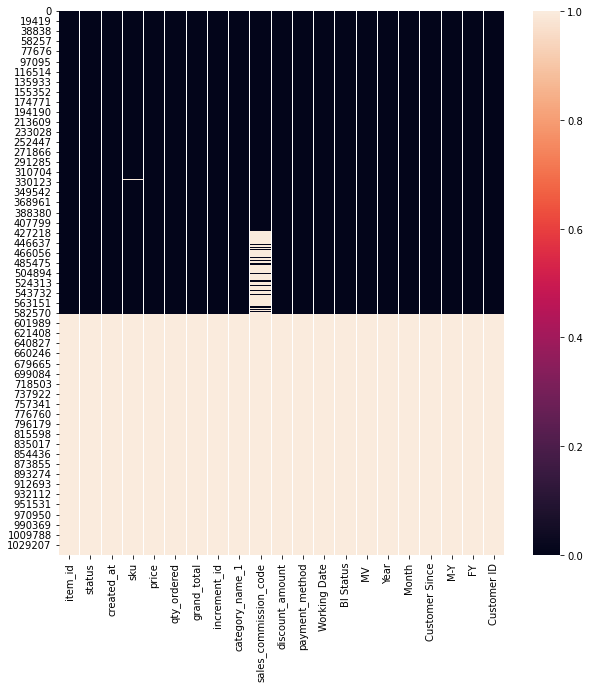

In [ ]:
# Check menggunakan heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

Berdasarkan visualisasi dapat diketahui bahwa benar, kolom 'Unnamed:21-25' kosong 100%, dan tidak diketahui deskripsi dari kolom tersebut. Jadi drop kolom merupakan tindakan yang dapat tepat.

Pada missing values selain kolom 'Unnamed:21-25', terdapat missing pada semua baris, sehingga memang dapat disimpulkan bahwa baris tersebut memang tidak ada isinya, sehingga dapat dilakukan drop baris.

In [ ]:
df = df.dropna( how="all")

In [ ]:
df.isna().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

Setelah dilakukan drop kolom dan drop baris yang memiliki missing values 100%. Tersisa kolom 'status', 'sku','category_name_1','sales_commision_code','customer since','customer id'

**Sales Commision Code**

In [ ]:
df.fillna({'sales_commission_code':'No Code'},inplace=True)

In [ ]:
df.isna().sum()

item_id                    0
status                    15
created_at                 0
sku                       20
price                      0
qty_ordered                0
grand_total                0
increment_id               0
category_name_1          164
sales_commission_code      0
discount_amount            0
payment_method             0
Working Date               0
BI Status                  0
 MV                        0
Year                       0
Month                      0
Customer Since            11
M-Y                        0
FY                         0
Customer ID               11
dtype: int64

**Costomer ID, Customer Since**

In [ ]:
df.dropna(subset=['Customer ID'], inplace=True)

In [ ]:
df.isna().sum()

item_id                    0
status                    15
created_at                 0
sku                       20
price                      0
qty_ordered                0
grand_total                0
increment_id               0
category_name_1          164
sales_commission_code      0
discount_amount            0
payment_method             0
Working Date               0
BI Status                  0
 MV                        0
Year                       0
Month                      0
Customer Since             0
M-Y                        0
FY                         0
Customer ID                0
dtype: int64

In [ ]:
# Drop baris missing values
df_drop = df.dropna()

In [ ]:
df_drop.isnull().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name_1          0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
 MV                      0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

## Data Duplicated

In [ ]:
#Data duplicated setelah dilakukan drop baris
df_drop.duplicated().sum()

0

DATA CLEAN

In [ ]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584314 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584314 non-null  float64
 1   status                 584314 non-null  object 
 2   created_at             584314 non-null  object 
 3   sku                    584314 non-null  object 
 4   price                  584314 non-null  float64
 5   qty_ordered            584314 non-null  float64
 6   grand_total            584314 non-null  float64
 7   increment_id           584314 non-null  object 
 8   category_name_1        584314 non-null  object 
 9   sales_commission_code  584314 non-null  object 
 10  discount_amount        584314 non-null  float64
 11  payment_method         584314 non-null  object 
 12  Working Date           584314 non-null  object 
 13  BI Status              584314 non-null  object 
 14   MV                    584314 non-nu

## Check Outliers

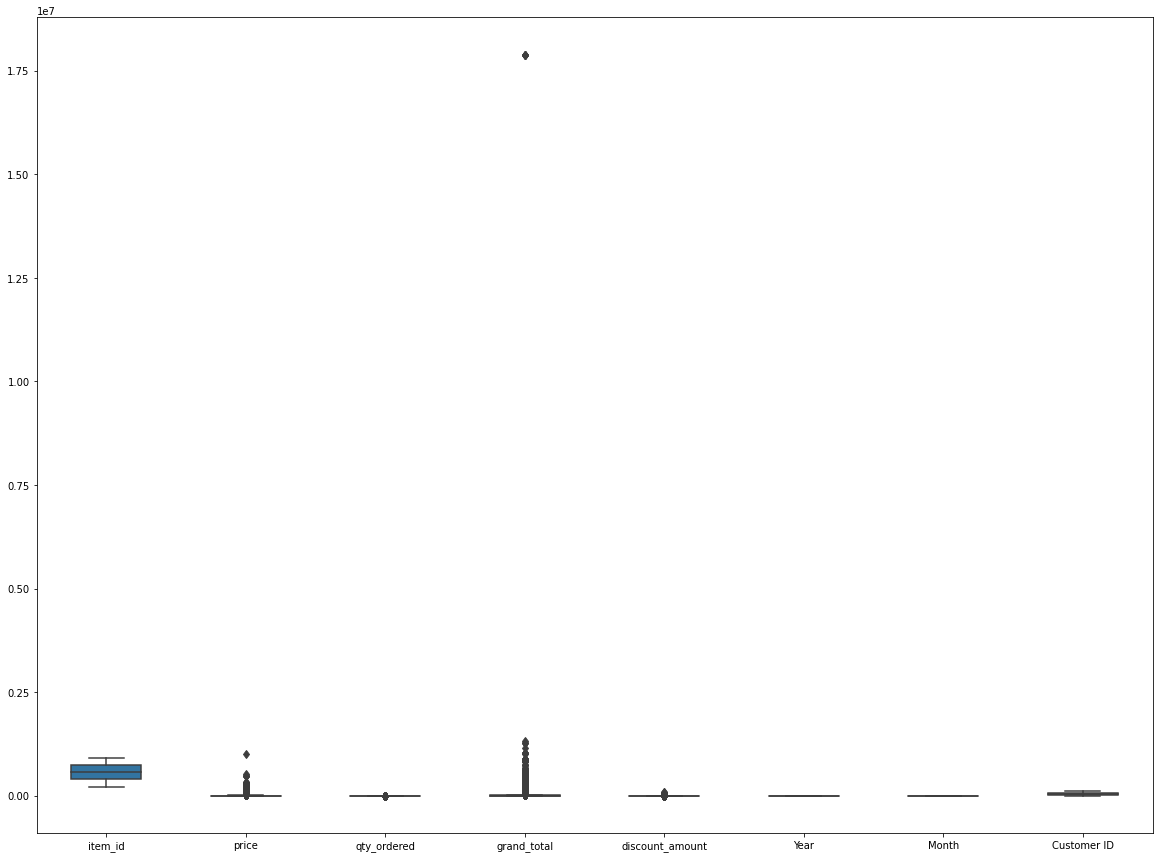

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=df_drop, width= 0.5,ax=ax,  fliersize=6)

In [ ]:
def outlier(df_drop, col):
  q1 = df[col].quantile(.25)
  q3 = df[col].quantile(.75)

  iqr = q3 -q1
  upper = q3 + (1.5 * iqr)
  bottom = q1 - (1.5 * iqr)

  return (df[col]<bottom) | (df_drop[col]>upper)

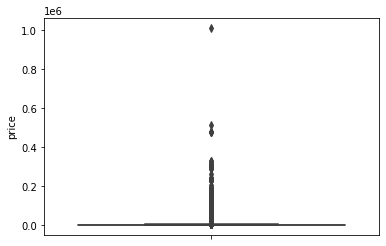

In [ ]:
sns.boxplot(data = df_drop, y='price')

In [ ]:
outlier(df_drop, 'price').sum()

105682

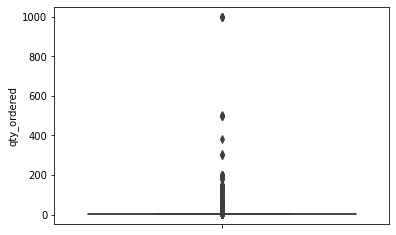

In [ ]:
sns.boxplot(data = df_drop, y='qty_ordered')

In [ ]:
outlier(df_drop, 'qty_ordered').sum()

79189

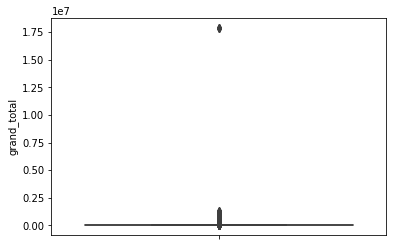

In [ ]:
sns.boxplot(data = df_drop, y='grand_total')

In [ ]:
df_drop['grand_total'].mean()

8532.892368258335

In [ ]:
outlier(df_drop, 'grand_total').sum()

77087

# Statistic Deskriptif

In [ ]:
num = ['price','qty_ordered','grand_total', 'discount_amount']

In [ ]:
df_drop[num].describe()

,price,qty_ordered,grand_total,discount_amount
count,5.843140e+05,584314.000000,5.843140e+05,584314.000000
mean,6.350766e+03,1.294308,8.532892e+03,499.655327
std,1.495150e+04,3.988150,6.133168e+04,1507.185808
min,0.000000e+00,1.000000,-1.594000e+03,-599.500000
25%,3.600000e+02,1.000000,9.452000e+02,0.000000
50%,8.994000e+02,1.000000,1.961000e+03,0.000000
75%,4.090000e+03,1.000000,6.999000e+03,160.734400
max,1.012626e+06,1000.000000,1.788800e+07,90300.000000


1. Range dari Price:

    0.000000e+00 - 1.012626e+06

1. Range dari Qty_Ordered:

    1.000000 - 1000.000000

1. Range dari Grand Total:

    -1.594000e+03 - 1.788800e+07

1. Range dari Discount Amount:

    -599.500000 - 90300.000000

# Statistic Inferential

In [ ]:
from scipy.stats import pearsonr

In [ ]:
Korelasi = pearsonr(df_drop['price'],df_drop['qty_ordered'])
print(Korelasi)

(-0.017449524933847965, 1.3640838733099082e-40)


Korelasi Pearson: -0,01

mengartikkan bahwa variabel 'Price' dan 'Qty_Ordered' memiliki korelasi negatif.

In [ ]:
Korelasi = pearsonr(df_drop['grand_total'],df_drop['discount_amount'])
print(Korelasi)

(0.10481626366760051, 0.0)


Korelasi Pearson: 0.1 

mengartikan bahwa variabel 'Grand Total' dan 'Discount Amount' memiliki korelasi yang positif tetapi dengan kategori korelasi yang lemah.

In [ ]:
import seaborn as sns

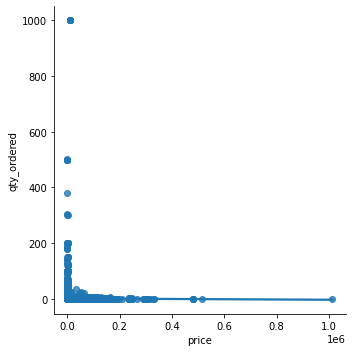

In [ ]:
sns.lmplot(x="price", y="qty_ordered", data= df_drop);

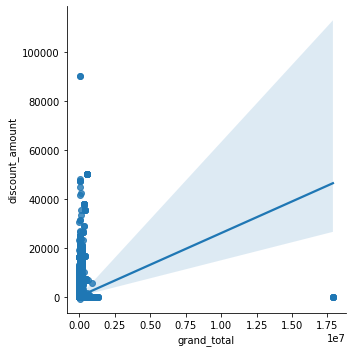

In [ ]:
sns.lmplot(x="grand_total", y="discount_amount", data= df_drop);

# Exploratory Data Analysis

In [ ]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df_drop.columns :
    listItem.append( [col, df_drop[col].nunique(), df_drop[col].unique()])

Unique = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
Unique

<ipython-input-40-a0e9e8a69aaa>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Number of Unique,Unique Sample
0,item_id,584314,"[211131.0, 211133.0, 211134.0, 211135.0, 211136.0, 211137.0, 211138.0, 211139.0, 211140.0, 211141.0, 211142.0, 211143.0, 211144.0, 211145.0, 211146.0, 211147.0, 211149.0, 211150.0, 211151.0, 211152.0, 211153.0, 211154.0, 211155.0, 211156.0, 211157.0, 211158.0, 211160.0, 211162.0, 211163.0, 211164.0, 211166.0, 211168.0, 211169.0, 211170.0, 211171.0, 211172.0, 211173.0, 211174.0, 211175.0, 211176.0, 211177.0, 211179.0, 211180.0, 211182.0, 211184.0, 211185.0, 211186.0, 211187.0, 211188.0, 211189.0, 211190.0, 211191.0, 211192.0, 211193.0, 211194.0, 211196.0, 211197.0, 211198.0, 211199.0, 211200.0, 211202.0, 211201.0, 211203.0, 211204.0, 211205.0, 211206.0, 211207.0, 211208.0, 211209.0, 211211.0, 211212.0, 211213.0, 211214.0, 211215.0, 211217.0, 211218.0, 211219.0, 211220.0, 211221.0, 211222.0, 211223.0, 211225.0, 211224.0, 211226.0, 211227.0, 211228.0, 211229.0, 211230.0, 211231.0, 211232.0, 211233.0, 211234.0, 211235.0, 211236.0, 211237.0, 211238.0, 211239.0, 211240.0, 211241.0, 211242.0, ...]"
1,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, processing, payment_review]"
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
3,sku,84869,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-650 , urban_ PT004-L, jackpot_JP-7999, UK_Gift Box Pistachio Delight 500 Gms, test_tcsconnect, sst_Lyquin-Regular fit-Large, Fcafe

### Profilling Order

In [ ]:
group_order_year = df_drop.groupby(df_drop['created_at'].dt.year)['item_id'].count()
group_order_year

created_at
2016    133901
2017    290908
2018    159505
Name: item_id, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


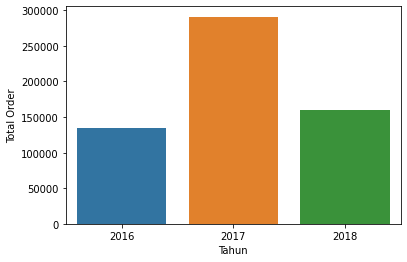

In [ ]:
df_order_year = (group_order_year).reset_index()
df_order_year.rename(columns = {'item_id': 'Total Order', 'created_at':'Tahun'}, inplace = True)

x= df_order_year['Tahun']
y= df_order_year['Total Order']

data = sns.barplot(x,y)

**Insight:**
Pada tahun 2017, mengalami jumlah order yang paling banyak dibanding kedua tahun yang lainnya.

### Grand Total

In [ ]:
group_gd = df_drop.groupby(df_drop['created_at'].dt.year)['grand_total'].sum()
group_gd

created_at
2016    6.455853e+08
2017    2.247206e+09
2018    2.093097e+09
Name: grand_total, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


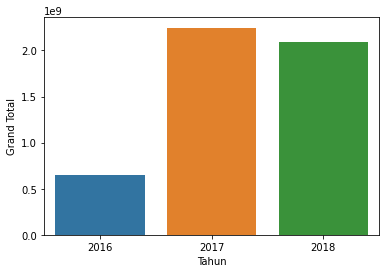

In [ ]:
df_order_year = (group_gd).reset_index()
df_order_year.rename(columns = {'grand_total': 'Grand Total', 'created_at':'Tahun'}, inplace = True)

x= df_order_year['Tahun']
y= df_order_year['Grand Total']

data = sns.barplot(x,y)

### Order Status

In [ ]:
group_grand_total = df_drop['status'].value_counts()
group_grand_total

complete          233684
canceled          201127
received          77284 
order_refunded    59498 
refund            8020  
cod               2854  
paid              1159  
closed            494   
payment_review    57    
pending           48    
processing        33    
holded            31    
fraud             10    
pending_paypal    7     
exchange          4     
\N                4     
Name: status, dtype: int64

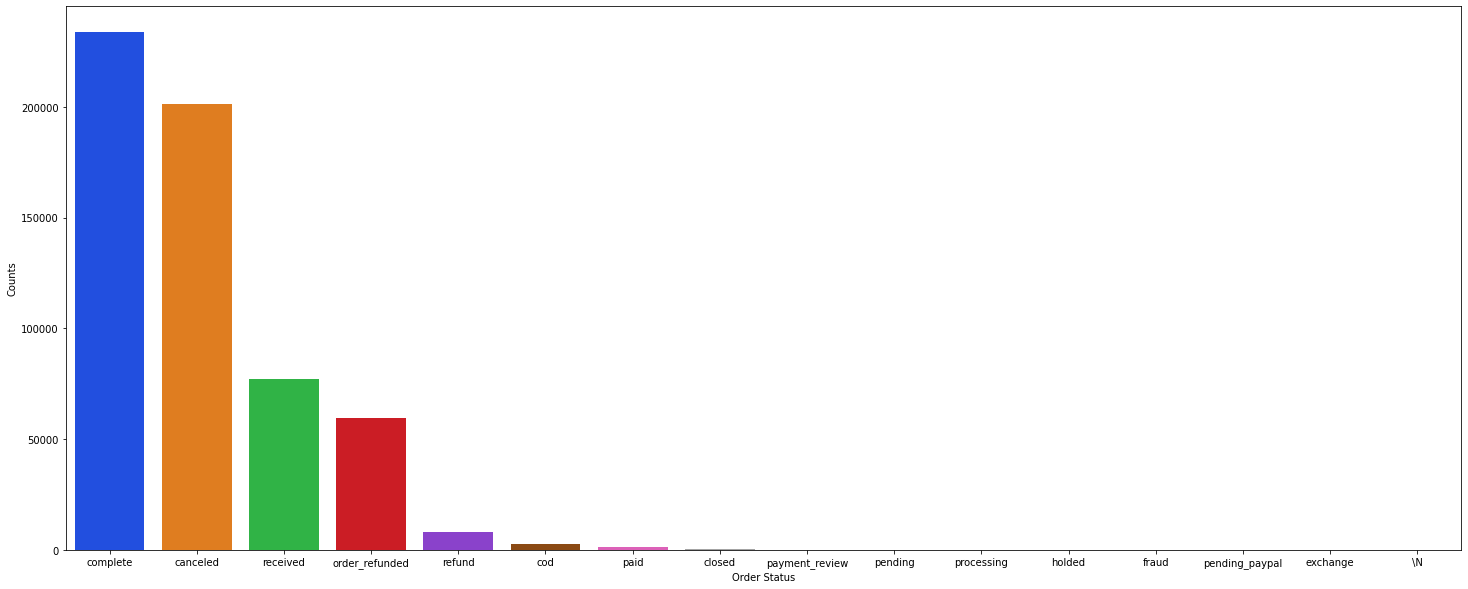

In [ ]:
status_df = pd.DataFrame(list(group_grand_total.items()), columns=['Order Status', 'Counts'])

plt.figure(figsize=(25,10))
sns.barplot(data = status_df, x= 'Order Status', y = "Counts", palette = "bright")

### Kategori

In [ ]:
Category = df_drop.groupby('category_name_1')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False).head(10)
Category

,category_name_1,count
9,Mobiles & Tablets,115709
8,Men's Fashion,92218
14,Women's Fashion,59720
0,Appliances,52413
13,Superstore,43611
1,Beauty & Grooming,41493
12,Soghaat,34011
10,Others,29208
6,Home & Living,26504
4,Entertainment,26322


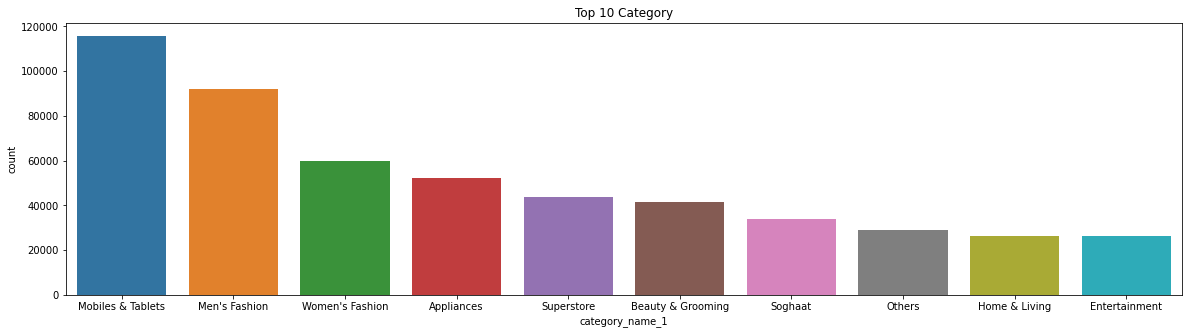

In [ ]:
plt.figure(figsize=(20,5))
graph=sns.barplot(x='category_name_1',y='count', data = Category)
graph.set_title('Top 10 Category')
plt.show() 

### Payment Method

In [ ]:
Payment_method = df_drop.groupby('payment_method')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False).head(10)
Payment_method

,payment_method,count
6,cod,271770
2,Payaxis,97640
0,Easypay,82893
12,jazzwallet,35145
8,easypay_voucher,31175
4,bankalfalah,23057
11,jazzvoucher,15633
1,Easypay_MA,14026
7,customercredit,7554
3,apg,1758


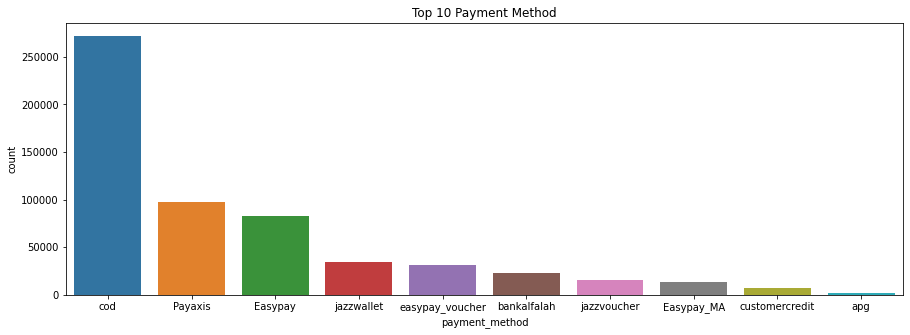

In [ ]:
plt.figure(figsize=(15,5))
graph=sns.barplot(x='payment_method',y='count',data= Payment_method)
graph.set_title('Top 10 Payment Method')
plt.show()

### RFM

In [ ]:
Now = dt(2018,12,28) # waktu dataset di publish

In [ ]:
df_recency = df_drop.groupby(['Customer ID'],as_index=False)['created_at'].max()
df_recency.columns = ['Customer ID','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(Now - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency

,Customer ID,Recency
0,1.0,910
1,2.0,763
2,3.0,588
3,4.0,123
4,5.0,910
...,...,...
115299,115322.0,122
115300,115323.0,122
115301,115324.0,122
115302,115325.0,122


In [ ]:
FM_Table = df_drop.groupby('Customer ID').agg({'item_id' : lambda x:len(x),
                                         'grand_total'  : lambda x:x.sum()})
FM_Table.rename(columns = {'item_id' :'Frequency',
                           'grand_total':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
Customer ID,,
1.0,1,1950.00
2.0,2,510.00
3.0,5,7430.00
4.0,428,2567596.45
5.0,1,1110.00


In [ ]:
rfm_table = df_recency.merge(FM_Table,left_on='Customer ID',right_on='Customer ID')
rfm_table.head()

,Customer ID,Recency,Frequency,Monetary
0,1.0,910,1,1950.00
1,2.0,763,2,510.00
2,3.0,588,5,7430.00
3,4.0,123,428,2567596.45
4,5.0,910,1,1110.00


In [ ]:
rfm_table.shape

(115304, 4)

In [ ]:
quantiles = rfm_table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [ ]:
segmented_rfm = rfm_table.copy()

In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,Customer ID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,1.0,910,1,1950.00,1,1,2
1,2.0,763,2,510.00,1,2,1
2,3.0,588,5,7430.00,2,4,3
3,4.0,123,428,2567596.45,4,4,4
4,5.0,910,1,1110.00,1,1,1


In [ ]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [ ]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [ ]:
segmented_rfm

,Customer ID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,1.0,910,1,1950.00,1,1,2,112,4
1,2.0,763,2,510.00,1,2,1,121,4
2,3.0,588,5,7430.00,2,4,3,243,9
3,4.0,123,428,2567596.45,4,4,4,444,12
4,5.0,910,1,1110.00,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...
115299,115322.0,122,2,2596.00,4,2,2,422,8
115300,115323.0,122,1,44499.00,4,1,4,414,9
115301,115324.0,122,1,549.00,4,1,1,411,6
115302,115325.0,122,2,1199.00,4,2,1,421,7


In [ ]:
def segmentrfm(x):
  if x == 12 :
    return 'Best Customers'
  elif x == 11:
    return 'Loyal Customers'
  elif x == 10 :
    return 'Promising Customers'
  elif x == 9 :
    return 'Promising Customers'
  elif x == 8:
    return 'At Risk'
  elif x == 7:
    return 'At Risk'
  elif x == 6:
    return 'Hibernating'
  elif x == 5:
    return 'Hibernating'
  elif x == 4:
    return 'Hibernating'
  elif x == 3:
    return 'Lost Customers'
  else:
    return x

In [ ]:
segmented_rfm['label'] = segmented_rfm['RFM_Score'].apply(segmentrfm)

In [ ]:
segmented_rfm

,Customer ID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,label
0,1.0,910,1,1950.00,1,1,2,112,4,Hibernating
1,2.0,763,2,510.00,1,2,1,121,4,Hibernating
2,3.0,588,5,7430.00,2,4,3,243,9,Promising Customers
3,4.0,123,428,2567596.45,4,4,4,444,12,Best Customers
4,5.0,910,1,1110.00,1,1,1,111,3,Lost Customers
...,...,...,...,...,...,...,...,...,...,...
115299,115322.0,122,2,2596.00,4,2,2,422,8,At Risk
115300,115323.0,122,1,44499.00,4,1,4,414,9,Promising Customers
115301,115324.0,122,1,549.00,4,1,1,411,6,Hibernating
115302,115325.0,122,2,1199.00,4,2,1,421,7,At Risk


# Save Dataframe

In [ ]:
#data_clean = df_drop.to_excel('/content/drive/MyDrive/Purwadhika/2. Data Analysis/Data_Clean.xlsx')
#rfm = segmented_rfm.to_excel('/content/drive/MyDrive/Purwadhika/2. Data Analysis/RFM.xlsx')

Diperlukan join data menggunakan values 'Customer ID' pada Tableau